In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Rahul@0004',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/rahul/OneDrive/Desktop/ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                            password = "Rahul@0004",
                            database = "ecommerce");

cur = db.cursor()



# List all unique cities where customers are located.


In [30]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [7]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 270606)

# Find the total sales per category.

In [15]:
query = """ select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns =["category","sales"])
df

,category,sales
0,ART,371915.16
1,COOL STUFF,9356376.00
2,GAMES CONSOLES,2345764.55
3,TELEPHONY,5842584.61
4,SPORT LEISURE,16705530.71
...,...,...
69,CDS MUSIC DVDS,14393.16
70,LA CUISINE,34962.36
71,FASHION CHILDREN'S CLOTHING,9428.04
72,PC GAMER,26093.16


# Calculate the percentage of orders that were paid in installments.

In [19]:
query = """ select( sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 from payments 
"""

cur.execute(query)

data = cur.fetchall()

"The percentage of order that were paid in installments is ",data[0][0]


('The percentage of order that were paid in installments is ',
 Decimal('99.9981'))

# Count the number of customers from each state.

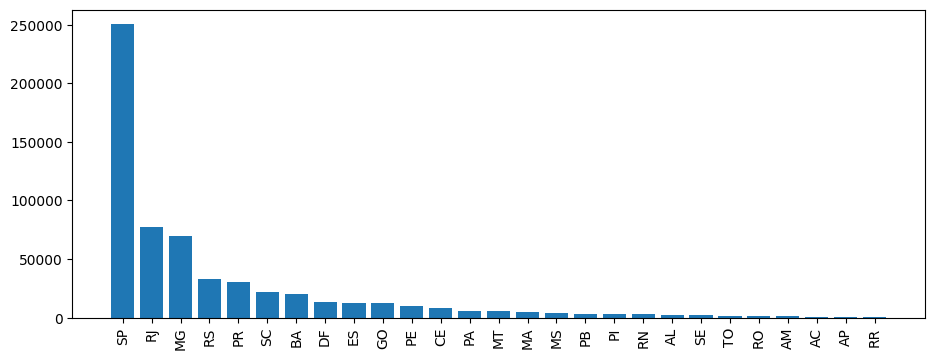

In [29]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df= pd.DataFrame(data,columns = ["state","customer_count"])
df = df.sort_values(by = "customer_count",ascending=False)
plt.figure(figsize = (11,4))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation =90)
plt.show()

# Calculate the number of orders per month in 2018.

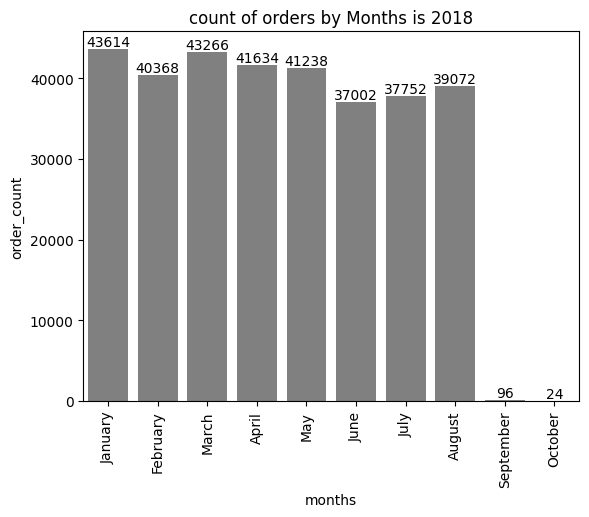

In [6]:
query = """ select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
O = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]

ax = sns.barplot(x = df["months"],y = df["order_count"], data =df, order = O, color = "grey")
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.title("count of orders by Months is 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [17]:
query = """with count_per_order as

(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc), 2) average_orders 
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns =["customer city","average order"])
df.head(10)

,customer city,average order
0,padre carvalho,42.00
1,celso ramos,39.00
2,datas,36.00
3,candido godoi,36.00
4,matias olimpio,30.00
5,cidelandia,24.00
6,curralinho,24.00
7,picarra,24.00
8,morro de sao paulo,24.00
9,teixeira soares,24.00


# Calculate the percentage of total revenue contributed by each product category.

In [32]:
query= """ select upper(products.product_category) AS category,
round((SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100,2) AS sales_percentage
from products
join order_items ON products.product_id = order_items.product_id
join payments ON payments.order_id = order_items.order_id
group by category
order by sales_percentage desc"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns =["category","percentage distribution"])
df.head(10)

,category,percentage distribution
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71
5,SPORT LEISURE,34.78
6,HOUSEWARES,27.35
7,AUTOMOTIVE,21.30
8,GARDEN TOOLS,20.95
9,COOL STUFF,19.48


# Identify the correlation between product price and the number of times a product has been purchased.

In [15]:
query = """ select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""



cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["category", "order_count","price"])
import numpy as np
arr1 =df["order_count"]
arr2 =df["price"]

np.corrcoef([arr1, arr2]) 
df = pd.DataFrame(data)
df.head()

,0,1,2
0,HEALTH BEAUTY,96700,130.16
1,sport leisure,86410,114.34
2,Cool Stuff,37960,167.36
3,computer accessories,78270,116.51
4,Watches present,59910,201.14


# Calculate the total revenue generated by each seller, and rank them by revenue.

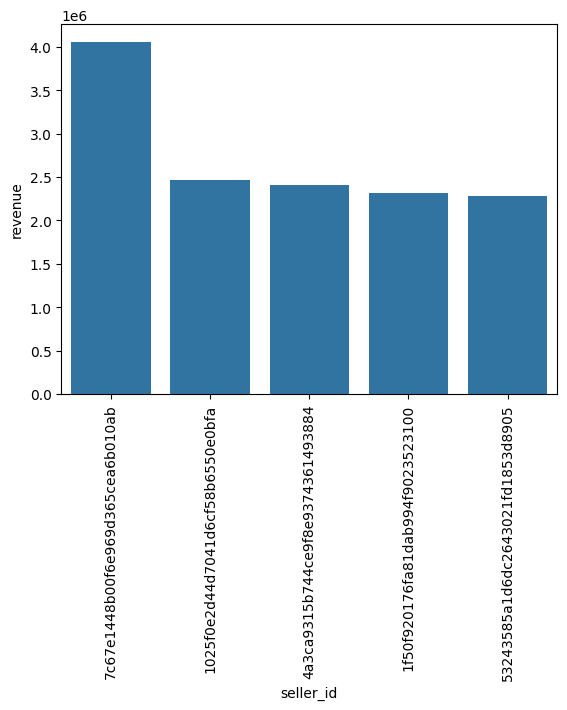

In [22]:
query = """ select*, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """



cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x="seller_id", y="revenue", data=df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [23]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data)
df 


,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
2908803,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
2908804,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
2908805,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
2908806,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


#  Calculate the cumulative sales per month for each year.

In [31]:
query = """select years, months, payment, sum(payment) 
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years, 
month(orders.order_purchase_timestamp) as months, 
round(sum(payments.payment_value), 2) as payment from orders join payments 
on orders.order_id = payments.order_id 
group by years, months order by years, months) as a
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data)
df 


,0,1,2,3
0,2016,9,7062.72,7.062720e+03
1,2016,10,1654533.44,1.661596e+06
2,2016,12,549.36,1.662146e+06
3,2017,1,3877665.12,5.539811e+06
4,2017,2,8173424.27,1.371323e+07
5,2017,3,12596180.79,2.630942e+07
6,2017,4,11698064.83,3.800748e+07
7,2017,5,16601726.96,5.460921e+07
8,2017,6,14315738.65,6.892495e+07
9,2017,7,16586721.75,8.551167e+07


#  Calculate the year-over-year growth rate of total sales.

In [54]:
query = """with a as (select year(orders.order_purchase_timestamp) as years, 
round(SUM(payments.payment_value), 2) as payment from orders join payments 
on orders.order_id = payments.order_id
group by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1)over(order by years)) * 100 from a """


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [57]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp <
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

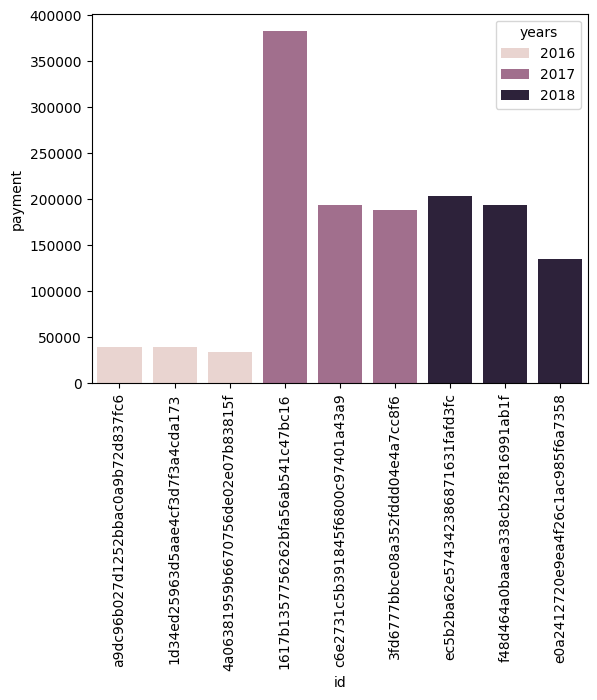

In [66]:
query = """select years, customer_id, payment, d_rank
from 
(select year(orders.order_purchase_timestamp) AS years,
orders.customer_id,
round(SUM(payments.payment_value), 2) AS payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) as d_rank
from orders join payments 
on orders.order_id = payments.order_id
group by years, 
orders.customer_id) as a
where d_rank <= 3;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years", "id", "payment", "rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()